# RK4

In [1]:
import sys
sys.path.append('../../')

from denn.rk4 import rk4
import numpy as np
import matplotlib.pyplot as plt

In [8]:
z_0 = 10
b = 5
Om_m_0 = 0.15
Om_L_0 = 1 - Om_m_0

def _z_to_z_prime(z_prime):
    return 1 - z_prime/z_0

def _z_prime_to_z(z_prime):
    return z_0*(1 - z_prime)

def _r_to_r_prime(r):
    r_prime = np.log(r)
    return r_prime

def _r_prime_to_r(r_prime):
    r = np.exp(r_prime)
    return r

def x_0_condition(z_prime):
    return 0.0

def y_0_condition(z_prime):
    z = _z_prime_to_z(z_prime)
    return (Om_m_0*((1 + z)**3) + 2*Om_L_0)/(2*(Om_m_0*((1 + z)**3) + Om_L_0))

def v_0_condition(z_prime):
    z = _z_prime_to_z(z_prime)
    return (Om_m_0*((1 + z)**3) + 4*Om_L_0)/(2*(Om_m_0*((1 + z)**3) + Om_L_0))

def Om_0_condition(z_prime):
    z = _z_prime_to_z(z_prime)
    return Om_m_0*((1 + z)**3)/((Om_m_0*((1 + z)**3) + Om_L_0))

def r_prime_0_condition(z_prime):
    z = _z_prime_to_z(z_prime)
    r_0 =  (Om_m_0*((1 + z)**3) + 4*Om_L_0)/Om_L_0
    r_prime_0 = _r_to_r_prime(r_0)
    return r_prime_0

def eins_deriv(t, eins):

    x, y, v, Om, r = eins[0], eins[1], eins[2], eins[3], eins[4]
    Gamma = (r + b)*(((r + b)**2) - 2*b) / (4*r*b)
    
    rhs1 = (-Om + x**2 + (1+v)*x - 2*v + 4*y) / (t+1)
    rhs2 = (- (v*x*Gamma - x*y + 4*y - 2*y*v)) / (t+1)
    rhs3 = (-v * (x*Gamma + 4 - 2*v)) / (t+1)
    rhs4 = (Om * (-1 + x + 2*v)) / (t+1)
    rhs5 = (-(x * r * Gamma)) / (t+1)
    return np.array([rhs1, rhs2, rhs3, rhs4, rhs5])

z_prime_0 = _z_to_z_prime(z_0)

init_cond = [x_0_condition(z_prime_0), 
             y_0_condition(z_prime_0), 
             v_0_condition(z_prime_0), 
             Om_0_condition(z_prime_0), 
             _r_prime_to_r(r_prime_0_condition(z_prime_0))]

In [9]:
t, sol = rk4(eins_deriv, [z_0, 0], init_cond, 1000)

In [33]:
from denn.ode_problems import EinsteinEquations
t_prime = _z_to_z_prime(t)
eins_sol = EinsteinEquations(z_0=10, Om_m_0=0.15, b=5, n=1000).get_solution(t_prime)
eins_sol[:, 4] = _r_prime_to_r(eins_sol[:, 4])

In [34]:
sol.shape, eins_sol.shape

((1001, 5), torch.Size([1001, 5]))

In [35]:
mse = np.mean( (sol - eins_sol.numpy())**2 )

In [36]:
mse

4.2615818e-07

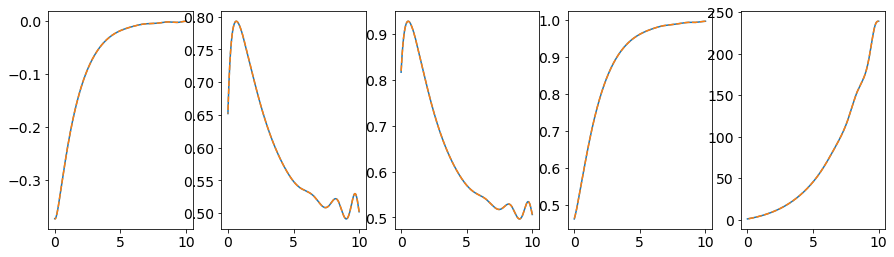

In [37]:
fig, ax = plt.subplots(1, 5, figsize=(15,4))
ax = ax.ravel()

for i in range(5):
    ax[i].plot(t, sol[:, i])
    ax[i].plot(t, eins_sol[:, i], '--')
    
plt.show()

# Model inits are fixed, data randomized

In [2]:
import denn.utils as ut

In [2]:
# folder = lambda i: f"/Users/dylanrandle/Downloads/SIR_run_gan_052520_seed{i}/val_mse.npy"
# gan_reps = []
# for i in range(5):
#     gan_reps.append(np.load(folder(i)))
# gan_reps = np.vstack(gan_reps)

In [3]:
# huber_reps1 = np.load('C:/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/reps/eins/eins_rand_reps1_huber.npy')
# huber_reps2 = np.load('C:/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/reps/eins/eins_rand_reps2_huber.npy')

# huber_reps = np.concatenate([huber_reps1, huber_reps2], axis=0)
# np.save('C:/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/reps/eins/eins_rand_reps_huber.npy', huber_reps)

In [23]:
gan_reps = np.load('C:/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/reps/eins/eins_rand_reps_gan.npy')

l2_reps = np.load('C:/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/reps/eins/eins_rand_reps_L2.npy')
#l2_reps = np.load('/Users/dylanrandle/Downloads/sir_reps_052520_mse.npy')

l1_reps = np.load('C:/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/reps/eins/eins_rand_reps_L1.npy')
#l1_reps = np.load('/Users/dylanrandle/Downloads/sir_reps_052520_l1.npy')

huber_reps = np.load('C:/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/reps/eins/eins_rand_reps_huber.npy')
#huber_reps = np.load('/Users/dylanrandle/Downloads/sir_reps_052520_huber.npy')

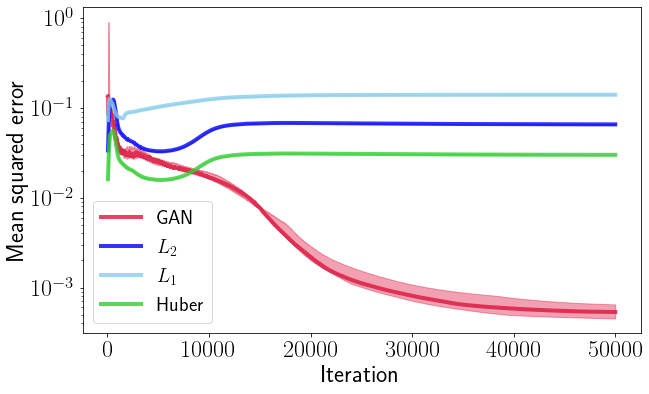

In [24]:
arrs_dict = {"GAN": gan_reps, 
             "$L_2$": l2_reps,
             "$L_1$": l1_reps, 
             "Huber": huber_reps,
#              "RK4": mse*np.ones_like(huber_reps)
            }
ut.plot_reps_results(arrs_dict, fname="eins_rand_reps.png", 
                     window=50, figsize=(10,6), pctiles=(25,75), linewidth=4)

In [25]:
print(f"L1 Min: {np.min(l1_reps)}")
print(f"L2 Min: {np.min(l2_reps)}")
print(f"Huber Min: {np.min(huber_reps)}")
print(f"GAN Min: {np.min(gan_reps)}")

L1 Min: 0.0638851597905159
L2 Min: 0.025235725566744804
Huber Min: 0.01238960213959217
GAN Min: 0.0003209899296052754


# With classical tuned

In [4]:
l2_reps_tuned = np.load('../../experiments/reps/sir_l2_rand_reps_classical_tuned.npy')
l1_reps_tuned = np.load('../../experiments/reps/sir_l1_rand_reps_classical_tuned.npy')
huber_reps_tuned = np.load('../../experiments/reps/sir_huber_rand_reps_classical_tuned.npy')

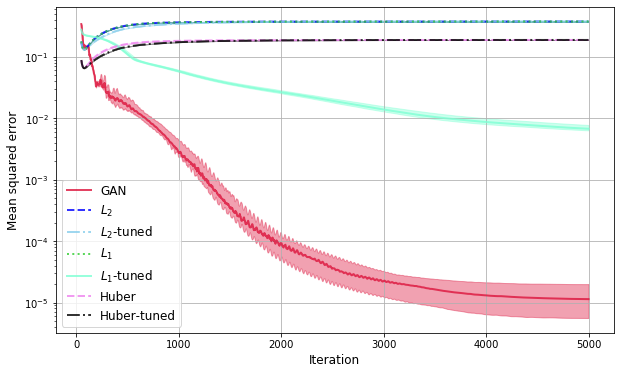

In [5]:
arrs_dict = {"GAN": gan_reps, 
             "$L_2$": l2_reps,
             "$L_2$-tuned": l2_reps_tuned,
             "$L_1$": l1_reps, 
             "$L_1$-tuned": l1_reps_tuned,
             "Huber": huber_reps,
             "Huber-tuned": huber_reps_tuned}
ut.plot_reps_results(arrs_dict, fname="sir_rand_reps_classic_tune.png", figsize=(10,6), window=50)

# Population conservation

$$ S(t) + I(t) + R(t) = N $$

In [122]:
import denn.utils

In [123]:
snum = np.load('../../experiments/runs/SIR_run_March20_gan/$S$_pred.npy')
inum = np.load('../../experiments/runs/SIR_run_March20_gan/$I$_pred.npy')
rnum = np.load('../../experiments/runs/SIR_run_March20_gan/$R$_pred.npy')

In [124]:
snum.shape

(200,)

In [125]:
numsum = snum + inum + rnum

In [126]:
numsum.shape

(200,)

In [127]:
spred = np.load('../../experiments/runs/SIR_run_March20_gan/$\hat{S}$_pred.npy')
ipred = np.load('../../experiments/runs/SIR_run_March20_gan/$\hat{I}$_pred.npy')
rpred = np.load('../../experiments/runs/SIR_run_March20_gan/$\hat{R}$_pred.npy')

In [128]:
predsum = spred + ipred + rpred

In [129]:
sl2 = np.load('../../experiments/runs/SIR_run_March20_l2/$\hat{S}$_pred.npy')
il2 = np.load('../../experiments/runs/SIR_run_March20_l2/$\hat{I}$_pred.npy')
rl2 = np.load('../../experiments/runs/SIR_run_March20_l2/$\hat{R}$_pred.npy')

In [130]:
sl1 = np.load('../../experiments/runs/SIR_run_March20_l1/$\hat{S}$_pred.npy')
il1 = np.load('../../experiments/runs/SIR_run_March20_l1/$\hat{I}$_pred.npy')
rl1 = np.load('../../experiments/runs/SIR_run_March20_l1/$\hat{R}$_pred.npy')

In [131]:
shu = np.load('../../experiments/runs/SIR_run_March20_smoothl1/$\hat{S}$_pred.npy')
ihu = np.load('../../experiments/runs/SIR_run_March20_smoothl1/$\hat{I}$_pred.npy')
rhu = np.load('../../experiments/runs/SIR_run_March20_smoothl1/$\hat{R}$_pred.npy')

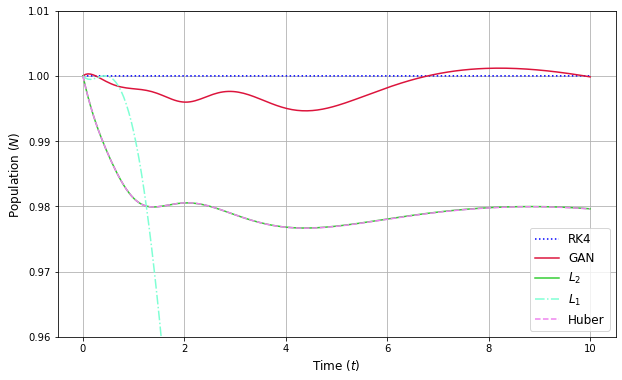

In [132]:
plt.figure(figsize=(10,6))
t = np.linspace(0, 10, 200)
plt.plot(t, numsum, label='RK4', color='blue', linestyle='dotted')
plt.plot(t, predsum, label='GAN', color='crimson')
plt.plot(t, sl2+il2+rl2, label='$L_2$', color='limegreen', linestyle='solid')
plt.plot(t, sl1+il1+rl1, label='$L_1$', color='aquamarine', linestyle='dashdot')
plt.plot(t, shu+ihu+rhu, label='Huber', color='violet', linestyle='dashed')
plt.xlabel('Time ($t$)')
plt.ylabel('Population ($N$)')
plt.legend(loc='lower right')
plt.grid()
plt.ylim([0.96, 1.01]);

In [133]:
from denn.problems import SIRModel
sir = SIRModel(n=200, S0=0.99, I0=0.01, R0=0.0, beta=3, gamma=1)

In [136]:
from scipy.integrate import odeint
init_cond = [sir.S0, sir.I0, sir.R0]
t = sir.grid.detach().flatten()
sol = odeint(sir._sir_system, init_cond, t, tfirst=True)

In [137]:
from scipy.integrate import solve_ivp
sol_ivp = solve_ivp(sir._sir_system, (0, 10), init_cond, t_eval=t)

In [138]:
sol_ivp.y.shape

(3, 200)

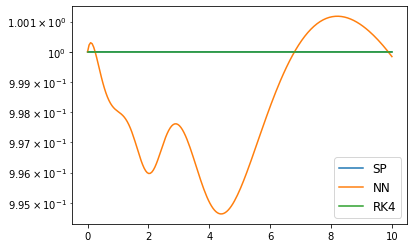

In [139]:
t = np.linspace(0, 10, 200)
plt.plot(t, numsum, label='SP')
plt.plot(t, predsum, label='NN')
plt.plot(t, np.sum(sol_ivp.y, axis=0), label='RK4')
plt.legend()
plt.yscale('log')

# Non-collapse initial conditions

In [148]:
snum = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_gan/$S$_pred.npy')
inum = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_gan/$I$_pred.npy')
rnum = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_gan/$R$_pred.npy')

In [149]:
spred = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_gan/$\hat{S}$_pred.npy')
ipred = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_gan/$\hat{I}$_pred.npy')
rpred = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_gan/$\hat{R}$_pred.npy')

In [150]:
sl2 = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_L2/$\hat{S}$_pred.npy')
il2 = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_L2/$\hat{I}$_pred.npy')
rl2 = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_L2/$\hat{R}$_pred.npy')

In [151]:
sl1 = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_L1/$\hat{S}$_pred.npy')
il1 = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_L1/$\hat{I}$_pred.npy')
rl1 = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_L1/$\hat{R}$_pred.npy')

In [152]:
shu = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_smoothL1/$\hat{S}$_pred.npy')
ihu = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_smoothL1/$\hat{I}$_pred.npy')
rhu = np.load('../../experiments/runs/SIR_run_March22_noncollapse_energy_smoothL1/$\hat{R}$_pred.npy')

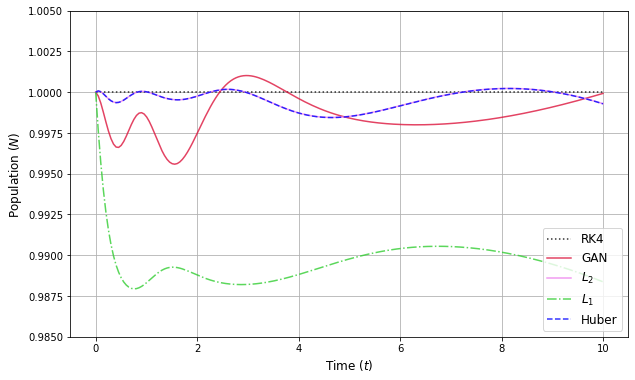

In [153]:
plt.figure(figsize=(10,6))
t = np.linspace(0, 10, 200)
alpha=0.8
plt.plot(t, snum+inum+rnum, label='RK4', color='black', linestyle='dotted', alpha=alpha)
plt.plot(t, spred+ipred+rpred, label='GAN', color='crimson', alpha=alpha)
plt.plot(t, sl2+il2+rl2, label='$L_2$', color='violet', linestyle='solid', alpha=alpha)
plt.plot(t, sl1+il1+rl1, label='$L_1$', color='limegreen', linestyle='dashdot', alpha=alpha)
plt.plot(t, shu+ihu+rhu, label='Huber', color='blue', linestyle='dashed', alpha=alpha)
plt.xlabel('Time ($t$)')
plt.ylabel('Population ($N$)')
plt.legend(loc='lower right')
plt.grid()
plt.ylim([0.985, 1.005]);

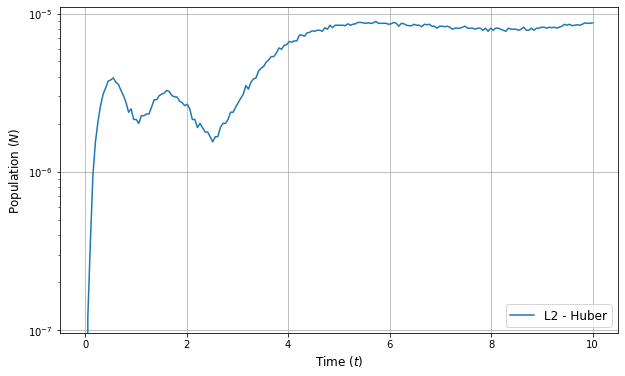

In [154]:
plt.figure(figsize=(10,6))
t = np.linspace(0, 10, 200)
alpha=0.8
# plt.plot(t, snum+inum+rnum, label='RK4', color='black', linestyle='dotted', alpha=alpha)
# plt.plot(t, spred+ipred+rpred, label='GAN', color='crimson', alpha=alpha)
# plt.plot(t, sl2+il2+rl2, label='$L_2$', color='violet', linestyle='solid', alpha=alpha)
# plt.plot(t, sl1+il1+rl1, label='$L_1$', color='limegreen', linestyle='dashdot', alpha=alpha)
# plt.plot(t, shu+ihu+rhu, label='Huber', color='blue', linestyle='dashed', alpha=alpha)
plt.plot(t, (sl2+il2+rl2) - (shu+ihu+rhu), label='L2 - Huber')
plt.yscale('log')
plt.xlabel('Time ($t$)')
plt.ylabel('Population ($N$)')
plt.legend(loc='lower right')
plt.grid()
# plt.ylim([0.985, 1.005]);

# Euler Method to compare

In [155]:
init_cond = [sir.S0, sir.I0, sir.R0]
t = sir.grid.detach().numpy().flatten()

In [156]:
def euler( x0, y, h, x, func ): 
    temp = -0
  
    # Iterating till the point at which we 
    # need approximation 
    while x0 < x: 
        temp = y 
        y = y + h * func(x0, y) 
        x0 = x0 + h 
        
    return y

In [157]:
h = float((t[1] - t[0]))
h

0.05025125667452812

In [158]:
yeul = []
init_cond = [0.7, 0.3, 0.0]
for p in t:
    yeu = euler(0, init_cond, h, p, sir._sir_system) 
    yeul.append(yeu)
yeul = np.vstack(yeul)

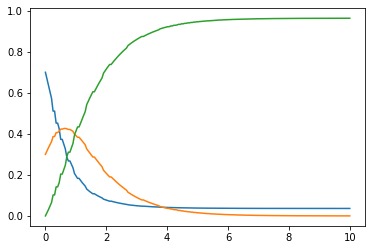

In [159]:
plt.plot(t, yeul[:,0])
plt.plot(t, yeul[:,1])
plt.plot(t, yeul[:,2]);

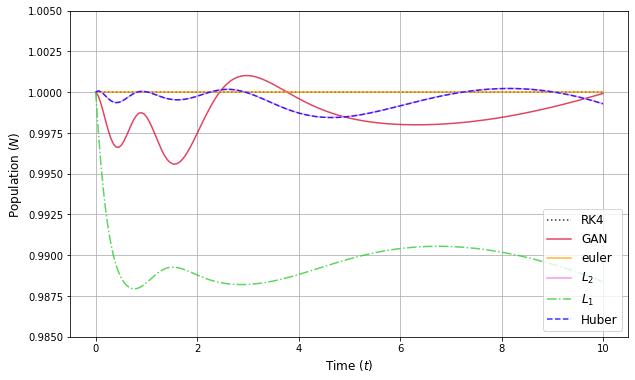

In [162]:
plt.figure(figsize=(10,6))
t = np.linspace(0, 10, 200)
alpha=0.8
plt.plot(t, snum+inum+rnum, label='RK4', color='black', linestyle='dotted', alpha=alpha)
plt.plot(t, spred+ipred+rpred, label='GAN', color='crimson', alpha=alpha)
plt.plot(t, np.sum(yeul, axis=1), label='euler', color='orange', alpha=alpha)
plt.plot(t, sl2+il2+rl2, label='$L_2$', color='violet', linestyle='solid', alpha=alpha)
plt.plot(t, sl1+il1+rl1, label='$L_1$', color='limegreen', linestyle='dashdot', alpha=alpha)
plt.plot(t, shu+ihu+rhu, label='Huber', color='blue', linestyle='dashed', alpha=alpha)
plt.xlabel('Time ($t$)')
plt.ylabel('Population ($N$)')
plt.legend(loc='lower right')
plt.grid()
plt.ylim([0.985, 1.005]);